In [5]:
import pandas as pd
import os

# File path
file_path = r'C:\Users\kiara\KiaraADS500B\Final Project\Dataset 1 (Bank Marketing)\bank_marketing.csv'

# Load the dataset with proper column names
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=';')  
    print("Dataset loaded successfully.")
else:
    print(f"File not found: {file_path}")

# Print column names to verify
print("Columns in the dataset:", df.columns)


Dataset loaded successfully.
Columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [20]:
# Identify and Encode Ordinal Variables
df.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_vars = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
ordinal_vars = ['education']

education_mapping = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education'] = df['education'].map(education_mapping)
print("Converted 'education' column:\n", df['education'].head())

# Check for NaN values
print(df[numerical_vars].isnull().sum())

# Check for infinite values using map instead of applymap
print(df[numerical_vars].apply(lambda col: col.map(np.isinf)).sum())

# Verify data types
print(df[numerical_vars].dtypes)


Converted 'education' column:
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: education, dtype: float64
age         1339
balance        0
day            0
duration       0
campaign       0
pdays          0
previous       0
dtype: int64
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64
age         float64
balance       int64
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
dtype: object


In [21]:
# Measures of centrality
print("Mean:\n", df[numerical_vars].mean())
print("Median:\n", df[numerical_vars].median())
print("Mode:\n", df[numerical_vars].mode())

# Measures of distribution
print("Standard Deviation:\n", df[numerical_vars].std())
print("Variance:\n", df[numerical_vars].var())
print("Description:\n", df[numerical_vars].describe())



Mean:
 age           40.924781
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64
Median:
 age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64
Mode:
     age  balance  day  duration  campaign  pdays  previous
0  32.0        0   20       124         1     -1         0
Standard Deviation:
 age           10.610835
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64
Variance:
 age         1.125898e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64
Description:
                 age        balance           day      duration      campaign  \
count  43872.000000   45211.000000  

Sampled DataFrame:
        age          job  marital  education default  balance housing loan  \
3776   40.0  blue-collar  married        NaN      no      580     yes   no   
9928   47.0     services   single        NaN      no     3644      no   no   
33409  25.0      student   single        NaN      no      538     yes   no   
31885  42.0   management  married        NaN      no     1773      no   no   
15738  56.0   management  married        NaN      no      217      no  yes   

        contact  day month  duration  campaign  pdays  previous poutcome  \
3776    unknown   16   may       192         1     -1         0  unknown   
9928    unknown    9   jun        83         2     -1         0  unknown   
33409  cellular   20   apr       226         1     -1         0  unknown   
31885  cellular    9   apr       311         1    336         1  failure   
15738  cellular   21   jul       121         2     -1         0  unknown   

      deposit  
3776       no  
9928       no  
33409  

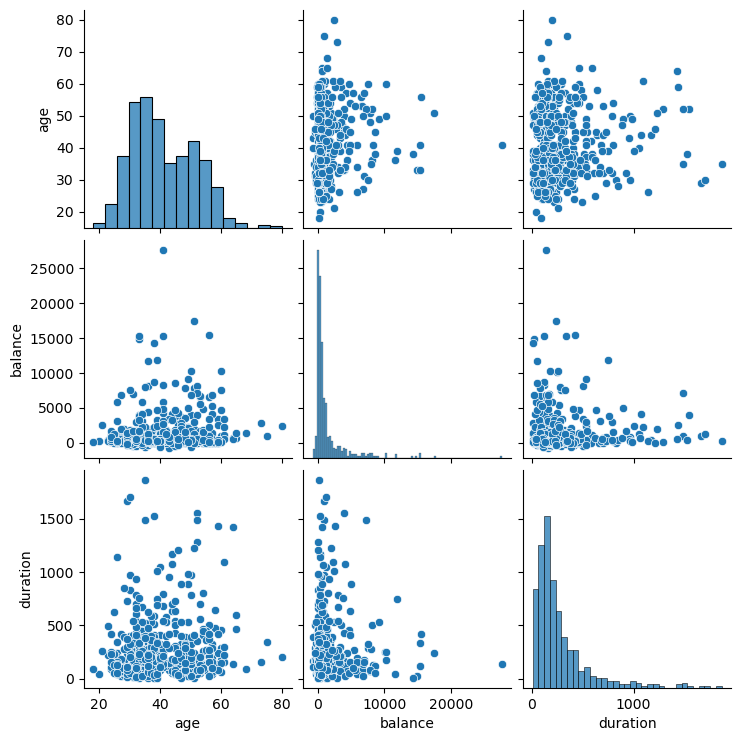

Generating Joint Plot for age and balance...


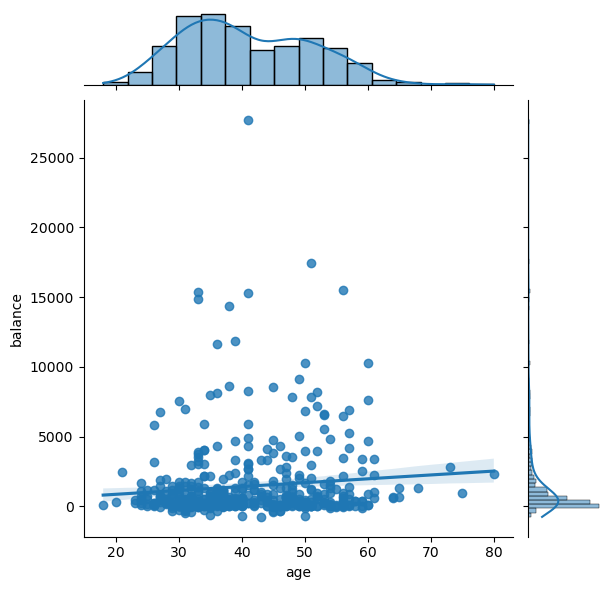

Data contains NaN values or invalid data for age or balance


In [24]:
# fix this one, pick specific points? maybe fix this

# Sample size
sample_size = 500  # Number of points to sample

# Check if the sample size is less than the DataFrame length
if sample_size < len(df):
    sample_df = df.sample(n=sample_size, random_state=42)  # Randomly sample n points
else:
    sample_df = df  

# Print the first few rows of the sampled data to verify
print("Sampled DataFrame:")
print(sample_df.head())

# Pair plot for specific numerical variables
selected_numerical_vars = ['age', 'balance', 'duration']  # Adjust this list as needed
print("Generating Pair Plot for specific numerical variables...")
sns.pairplot(sample_df[selected_numerical_vars])
plt.show()

# Joint plot for a specific pair of variables
x_var = 'age'
y_var = 'balance'
print(f"Generating Joint Plot for {x_var} and {y_var}...")
sns.jointplot(x=x_var, y=y_var, data=sample_df, kind='reg')
plt.show()

# Check if the categorical and numerical variables have valid data
if sample_df[x_var].notna().all() and sample_df[y_var].notna().all():
    # Violin plot for a specific numerical variable against a categorical variable
    x_var = 'education'
    y_var = 'balance'
    print(f"Generating Violin Plot for {y_var} across {x_var} levels...")
    sns.violinplot(x=x_var, y=y_var, data=sample_df)
    plt.show()
else:
    print(f"Data contains NaN values or invalid data for {x_var} or {y_var}")




Generating Count Plots for specific categorical variables...


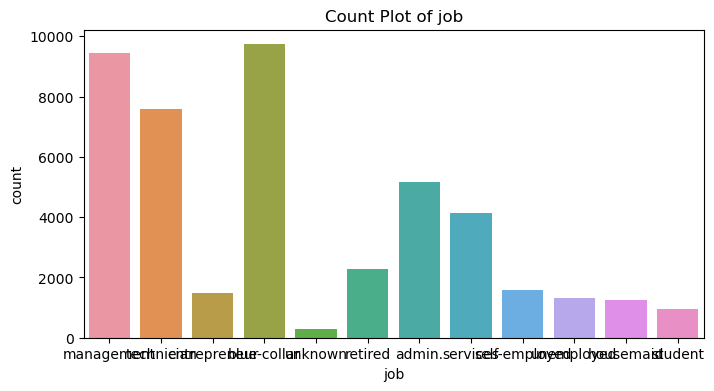

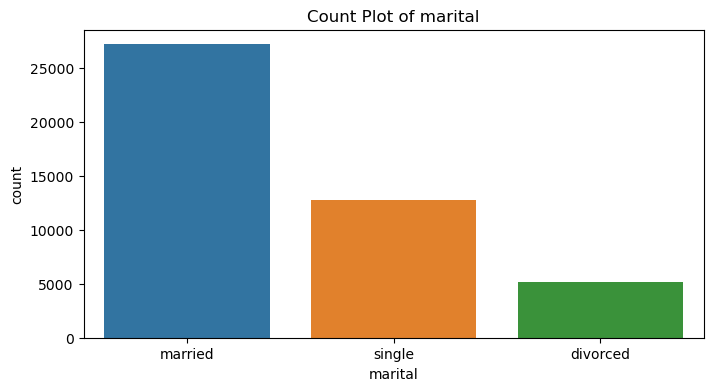

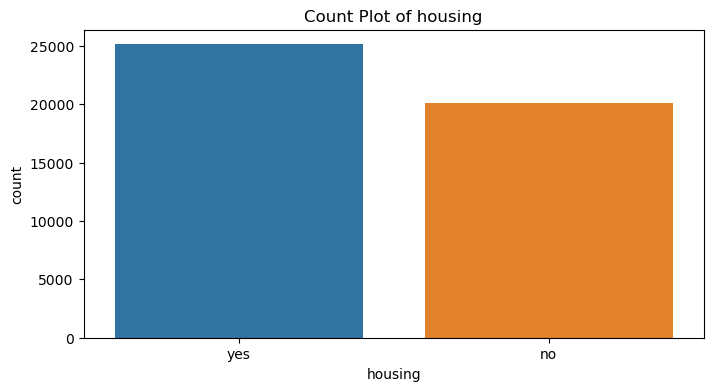

In [25]:
# Count plot for specific categorical variables
specific_categorical_vars = ['job', 'marital', 'housing']  # Adjust this list as needed?

print("Generating Count Plots for specific categorical variables...")
for var in specific_categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[var])
    plt.title(f'Count Plot of {var}')
    plt.show()



Generating Cross Tabulation and Heatmaps for specific pairs of categorical variables...


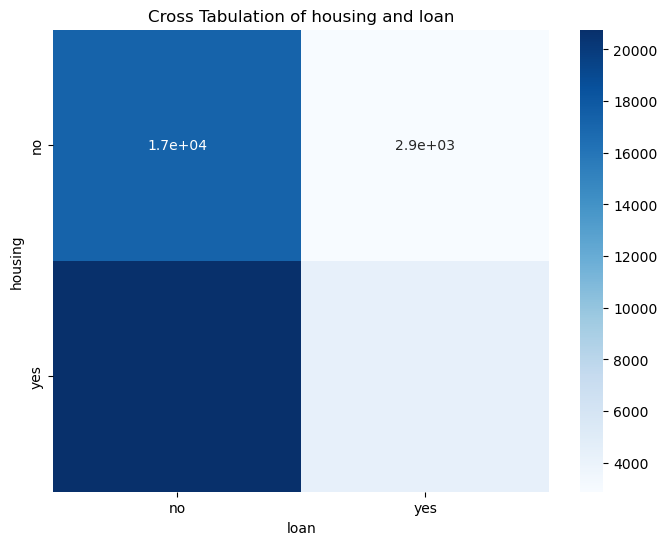

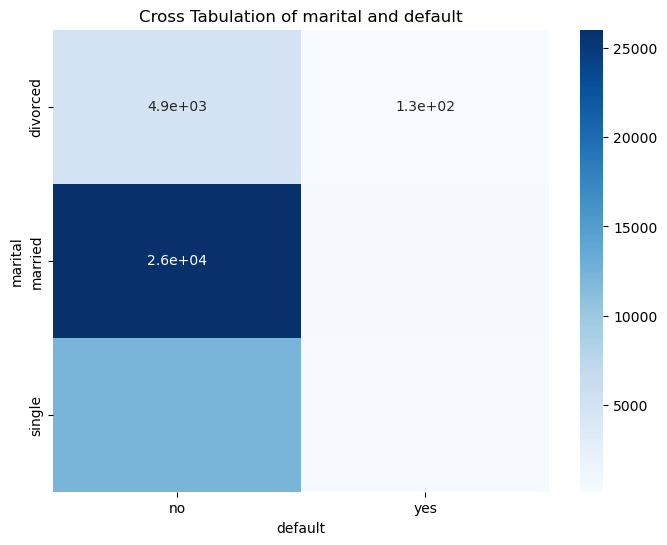

In [26]:
# Cross-tabulation and heatmap for specific pairs of categorical variables
cross_tab_pairs = [('housing', 'loan'), ('marital', 'default')]  # Adjust this list as needed?

print("Generating Cross Tabulation and Heatmaps for specific pairs of categorical variables...")
for var1, var2 in cross_tab_pairs:
    cross_tab = pd.crosstab(df[var1], df[var2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_tab, annot=True, cmap='Blues')
    plt.title(f'Cross Tabulation of {var1} and {var2}')
    plt.show()


Correlation Matrix:
                age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097713 -0.008851 -0.003159  0.004933 -0.022138  0.001445
balance   0.097713  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.008851  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.003159  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004933 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.022138  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001445  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


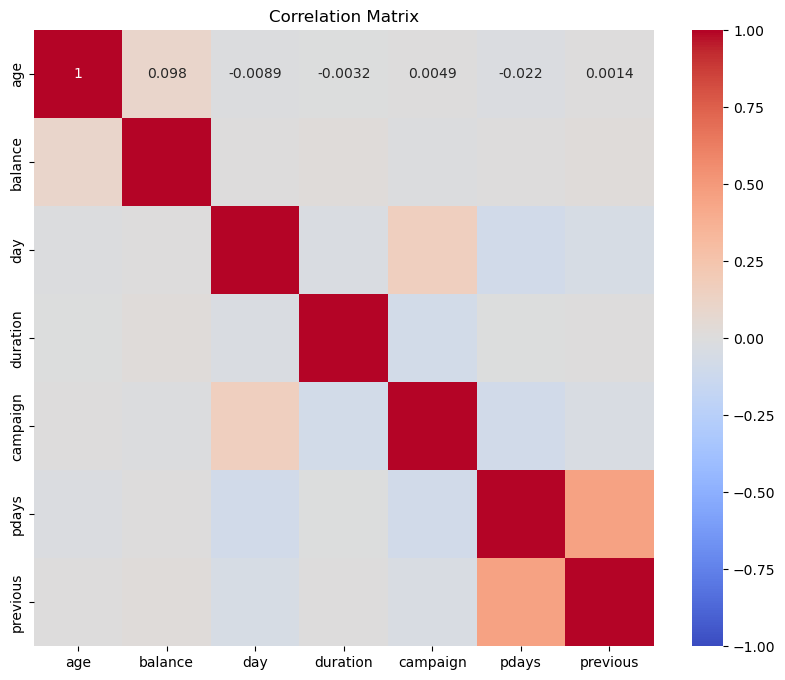

Significant Correlation Pairs (above threshold):
 []
Generating Scatter Plots for significant correlations...


In [28]:
import warnings

# Suppress specific FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Correlation matrix
correlation_matrix = df[numerical_vars].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Set a threshold for significant correlations
threshold = 0.5

# Function to find pairs of variables with high correlation
def find_significant_correlations(correlation_matrix, threshold):
    significant_pairs = []
    for var1 in correlation_matrix.columns:
        for var2 in correlation_matrix.columns:
            if var1 != var2 and abs(correlation_matrix.loc[var1, var2]) > threshold:
                significant_pairs.append((var1, var2, correlation_matrix.loc[var1, var2]))
    return significant_pairs

# Get significant correlations
significant_pairs = find_significant_correlations(correlation_matrix, threshold)
print("Significant Correlation Pairs (above threshold):\n", significant_pairs)

# Scatter plots for significant correlations
print("Generating Scatter Plots for significant correlations...")
for var1, var2, corr_value in significant_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var1], y=df[var2])
    plt.title(f'Scatter Plot of {var1} vs {var2} (Correlation: {corr_value:.2f})')
    plt.show()

